# Loading on an Infinite Strip - PTV - 2 ordem - Polinomial

In [1]:
# Importar biblioteca
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Declarar variáveis
x, z, p, E, v, a , b = symbols('x z p E v a b')
# Declarar funções de aproximação
phi = Matrix([[(x**2-a**2)**1*(z-a)**1,0],[0,(x**2-a**2)**1*(z-a)**1],[(x**2-a**2)**1*(z-a)**2,0],[0,(x**2-a**2)**1*(z-a)**2],[(x**2-a**2)**2*(z-a)**1,0],[0,(x**2-a**2)**2*(z-a)**1],[(x**2-a**2)**2*(z-a)**2,0],[0,(x**2-a**2)**2*(z-a)**2]])
phim = Matrix([0,(x**2-a**2)**1*(z-a)**1,0,(x**2-a**2)**1*(z-a)**2,0,(x**2-a**2)**2*(z-a)**1,0,(x**2-a**2)**2*(z-a)**2])
dphix = diff(phi,x)
dphiz = diff(phi,z)
L=(v*E)/((1+v)*(1-2*v))
G=E/(2*(1+v))
# Número de funções de aproximação
n=8

In [3]:
# Loop para construção de K e F
K=zeros(n,n)
F=zeros(n,1)
for i in range(n):
    if i%2==0:
        F[i]=0
        for j in range(n):
            if j%2==0:
                K[i,j]=integrate(integrate((1/v-1)*L*dphix[i]*dphix[j]+G*dphiz[i]*dphiz[j], (x, -a, a)), (z, 0, a))
            else:
                K[i,j]=integrate(integrate(L*dphix[i]*dphiz[j]+G*dphiz[i]*dphix[j], (x, -a, a)), (z, 0, a))
    else:
        F[i]=integrate(phim[i]*p, (x, -b, b))
        for j in range(n):
            if j%2==0:
                K[i,j]=integrate(integrate(L*dphiz[i]*dphix[j]+G*dphix[i]*dphiz[j], (x, -a, a)), (z, 0, a))
            else:
                K[i,j]=integrate(integrate((1/v-1)*L*dphiz[i]*dphiz[j]+G*dphix[i]*dphix[j], (x, -a, a)), (z, 0, a)) 
                
print('K =')
print(K)
print('F =')
print(F)
print('det K =')
K.det()

K =
Matrix([[a**3*(8*E*a**3*v - 8*E*a**3)/(18*v**2 + 9*v - 9) + a**2*(-8*E*a**4*v + 8*E*a**4)/(6*v**2 + 3*v - 3) + a*(56*E*a**5*v - 48*E*a**5)/(30*v**2 + 15*v - 15), 0, 0, 0, a**4*(2*E*a**3*v - 2*E*a**3)/(6*v**2 + 3*v - 3) + a**3*(-8*E*a**4*v + 8*E*a**4)/(6*v**2 + 3*v - 3) + a**2*(76*E*a**5*v - 68*E*a**5)/(30*v**2 + 15*v - 15) + a*(-72*E*a**6*v + 56*E*a**6)/(30*v**2 + 15*v - 15), 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4*E*a**6/(9*v + 9) - 4*E*a**6/(3*v + 3) + a*(56*E*a**5*v - 36*E*a**5)/(30*v**2 + 15*v - 15), 0, 0, 0, -3*E*a**7/(3*v + 3) + a**2*(76*E*a**5*v - 46*E*a**5)/(30*v**2 + 15*v - 15) + a*(-72*E*a**6*v + 52*E*a**6)/(30*v**2 + 15*v - 15)], [a**4*(2*E*a**3*v - 2*E*a**3)/(6*v**2 + 3*v - 3) + a**3*(-8*E*a**4*v + 8*E*a**4)/(6*v**2 + 3*v - 3) + a**2*(76*E*a**5*v - 68*E*a**5)/(30*v**2 + 15*v - 15) + a*(-72*E*a**6*v + 56*E*a**6)/(30*v**2 + 15*v - 15), 0, 0, 0, a**5*(8*E*a**3*v - 8*E*a**3)/(30*v**2 + 15*v - 15) + a**4*(-8*E*a**4*v + 8*E*a**4)/(6*v**2 + 3*

0

In [4]:
# Deletar linhas e colunas nulas
rows_to_delete = [1,2,5,6]
cols_to_delete = [1,2,5,6]
K_aux = np.delete(K, rows_to_delete, axis=0)
K_red = np.delete(K_aux, cols_to_delete, axis=1)
F_red = np.delete(F, rows_to_delete, axis=0)
K_red_sp=Matrix(K_red)
F_red_sp=Matrix(F_red)
print('K_red =')
print(K_red_sp)
print('F_red =')
print(F_red_sp)
print('det K_red =')
K_red_sp.det()

K_red =
Matrix([[a**3*(8*E*a**3*v - 8*E*a**3)/(18*v**2 + 9*v - 9) + a**2*(-8*E*a**4*v + 8*E*a**4)/(6*v**2 + 3*v - 3) + a*(56*E*a**5*v - 48*E*a**5)/(30*v**2 + 15*v - 15), 0, a**4*(2*E*a**3*v - 2*E*a**3)/(6*v**2 + 3*v - 3) + a**3*(-8*E*a**4*v + 8*E*a**4)/(6*v**2 + 3*v - 3) + a**2*(76*E*a**5*v - 68*E*a**5)/(30*v**2 + 15*v - 15) + a*(-72*E*a**6*v + 56*E*a**6)/(30*v**2 + 15*v - 15), 0], [0, 4*E*a**6/(9*v + 9) - 4*E*a**6/(3*v + 3) + a*(56*E*a**5*v - 36*E*a**5)/(30*v**2 + 15*v - 15), 0, -3*E*a**7/(3*v + 3) + a**2*(76*E*a**5*v - 46*E*a**5)/(30*v**2 + 15*v - 15) + a*(-72*E*a**6*v + 52*E*a**6)/(30*v**2 + 15*v - 15)], [a**4*(2*E*a**3*v - 2*E*a**3)/(6*v**2 + 3*v - 3) + a**3*(-8*E*a**4*v + 8*E*a**4)/(6*v**2 + 3*v - 3) + a**2*(76*E*a**5*v - 68*E*a**5)/(30*v**2 + 15*v - 15) + a*(-72*E*a**6*v + 56*E*a**6)/(30*v**2 + 15*v - 15), 0, a**5*(8*E*a**3*v - 8*E*a**3)/(30*v**2 + 15*v - 15) + a**4*(-8*E*a**4*v + 8*E*a**4)/(6*v**2 + 3*v - 3) + a**3*(304*E*a**5*v - 272*E*a**5)/(90*v**2 + 45*v - 45) + a**2*(-144*E

(1660*E**2*a**14*v**2 - 2844*E**2*a**14*v + 1199*E**2*a**14)*(1660*E**2*a**14*v**2 - 2136*E**2*a**14*v + 668*E**2*a**14)/(8100*v**4 + 8100*v**3 - 6075*v**2 - 4050*v + 2025)**2

In [5]:
# Solução do sistema de equações
c_red=simplify(K_red_sp.inv()*F_red_sp)
print('c_red =')
print(c_red)

c_red =
Matrix([[0], [6*b*p*(20*a*(-3*a**2 + b**2)*(a**2 - 2*a*z + z**2)*(44*v**3 - 16*v**2 - 41*v + 19) + 3*(15*a**4*(a**2 - 2*a*z + z**2) + 10*a**2*b**2*(-a**2 + 2*a*z - z**2) + 3*b**4*(a**2 - 2*a*z + z**2))*(52*v**3 - 16*v**2 - 47*v + 21))/(E*a**7*(1660*v**2 - 2844*v + 1199))], [0], [6*b*p*(15*a*(-3*a**2 + b**2)*(a**2 - 2*a*z + z**2)*(52*v**3 - 16*v**2 - 47*v + 21) + 4*(15*a**4*(a**2 - 2*a*z + z**2) + 10*a**2*b**2*(-a**2 + 2*a*z - z**2) + 3*b**4*(a**2 - 2*a*z + z**2))*(44*v**3 - 12*v**2 - 39*v + 17))/(E*a**8*(1660*v**2 - 2844*v + 1199))]])


In [6]:
# Calcular u e v
phi_red = np.delete(phi, rows_to_delete, axis=0)
aprox = phi_red.T*c_red
u_aux = np.delete(aprox, [1], axis=0)
v_aux = np.delete(aprox, [0], axis=0)
u_aux2 = Matrix(u_aux)
v_aux2 = Matrix(v_aux)
u_sp = u_aux2.subs([(E, 10e3), (v, 0.4), (p, 20), (a, 100), (b, 10)])
v_sp = v_aux2.subs([(E, 10e3), (v, 0.4), (p, 20), (a, 100), (b, 10)])
uu = np.squeeze(u_aux)
vv = np.squeeze(v_aux)
print('u = ')
print(uu)
print('v = ')
print(vv)

u = 
0
v = 
6*b*p*(-a + z)**2*(-a**2 + x**2)*(20*a*(-3*a**2 + b**2)*(a**2 - 2*a*z + z**2)*(44*v**3 - 16*v**2 - 41*v + 19) + 3*(15*a**4*(a**2 - 2*a*z + z**2) + 10*a**2*b**2*(-a**2 + 2*a*z - z**2) + 3*b**4*(a**2 - 2*a*z + z**2))*(52*v**3 - 16*v**2 - 47*v + 21))/(E*a**7*(1660*v**2 - 2844*v + 1199)) + 6*b*p*(-a + z)**2*(-a**2 + x**2)**2*(15*a*(-3*a**2 + b**2)*(a**2 - 2*a*z + z**2)*(52*v**3 - 16*v**2 - 47*v + 21) + 4*(15*a**4*(a**2 - 2*a*z + z**2) + 10*a**2*b**2*(-a**2 + 2*a*z - z**2) + 3*b**4*(a**2 - 2*a*z + z**2))*(44*v**3 - 12*v**2 - 39*v + 17))/(E*a**8*(1660*v**2 - 2844*v + 1199))


In [7]:
# Calcular Energia Potencial Total
Pi=0.5*integrate(integrate(L*(u_sp.diff(x)+v_sp.diff(z))**2+G*((u_sp.diff(z)+v_sp.diff(x))**2+2*(u_sp.diff(x)**2+v_sp.diff(z)**2)), (z, 0, a)), (x, -a, a))-integrate(p*v_sp, (x,-b, b))
print('Pi = ')
Pi.subs([(E, 10e3), (v, 0.4), (p, 20), (a, 100), (b, 10), (z, 0)])

Pi = 


Matrix([[4.9332330330984e+17]])

## Plotagem

In [8]:
# Definir valor dos parâmetros da placa
E,v,p,a,b=10e3,0.4,20,100,10

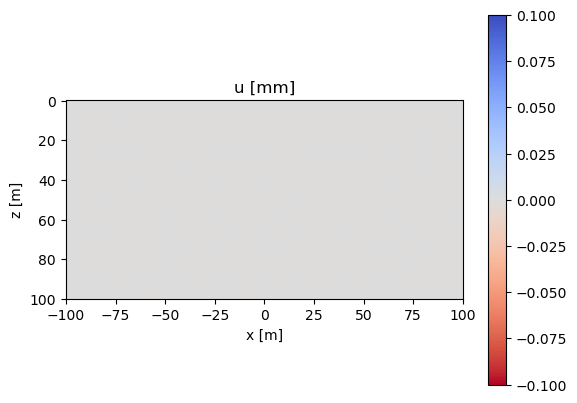

In [11]:
# Criar uma mesh 2D
x = np.linspace(-100, 100, 2000)
z = np.linspace(0, 100, 1000)
xx, zz = np.meshgrid(x, z)

# Plotar o mapa de calor
plt.imshow(0*xx, cmap='coolwarm_r', extent=[x.min(), x.max(), z.min(), z.max()])

# Legenda
plt.colorbar()

# Inverter o eixo y
plt.gca().invert_yaxis()

# Eixos
plt.xlabel('x [m]')
plt.ylabel('z [m]')

# Título
plt.title('u [mm]')

# Plot
plt.show()

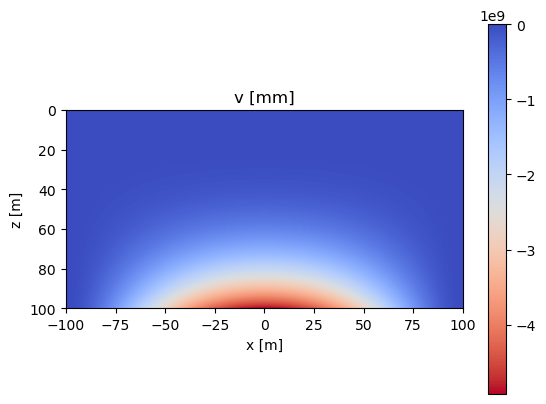

In [10]:
# Criar uma mesh 2D
x = np.linspace(-100, 100, 2000)
z = np.linspace(0, 100, 1000)
xx, zz = np.meshgrid(x, z)

# Plotar o mapa de calor
plt.imshow((6*b*p*(-a + zz)**2*(-a**2 + xx**2)*(20*a*(-3*a**2 + b**2)*(a**2 - 2*a*zz + zz**2)*(44*v**3 - 16*v**2 - 41*v + 19) + 3*(15*a**4*(a**2 - 2*a*zz + zz**2) + 10*a**2*b**2*(-a**2 + 2*a*zz - zz**2) + 3*b**4*(a**2 - 2*a*zz + zz**2))*(52*v**3 - 16*v**2 - 47*v + 21))/(E*a**7*(1660*v**2 - 2844*v + 1199)) + 6*b*p*(-a + zz)**2*(-a**2 + xx**2)**2*(15*a*(-3*a**2 + b**2)*(a**2 - 2*a*zz + zz**2)*(52*v**3 - 16*v**2 - 47*v + 21) + 4*(15*a**4*(a**2 - 2*a*zz + zz**2) + 10*a**2*b**2*(-a**2 + 2*a*zz - zz**2) + 3*b**4*(a**2 - 2*a*zz + zz**2))*(44*v**3 - 12*v**2 - 39*v + 17))/(E*a**8*(1660*v**2 - 2844*v + 1199)))*-1000, cmap='coolwarm_r', extent=[x.min(), x.max(), z.min(), z.max()])

# Legenda
plt.colorbar()

# Inverter o eixo y
plt.gca().invert_yaxis()

# Eixos
plt.xlabel('x [m]')
plt.ylabel('z [m]')

# Título
plt.title('v [mm]')

# Plot
plt.show()